# Atratores Caóticos

* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: 04/07/2025

$\quad$ O presente `Notebook` tem como objetivo introduzir a teoria dos atratores caóticos, junto com a ilustração, através de simulação 3D, de alguns atratores relevantes na literatura. Dentro dessa teoria, abordaremos o caso dos atratores estranhos, que serão definidamente definimos ao longo as próximas linhas.

## Pré-requisitos

$\quad$ Toda a teoria necessária sobres os atratores caóticos será introduzida neste `Notebook`, de modo que não será necessário conhecimento breve no tópico. Contudo, a principal ferramenta utilizada nesse trabalho será a intregação numérica através de Runge-Kutta de Quarta Ordem. Logo, é recomendado que o leitor tenha uma noção mínima da existência desse método e de como utilizá-lo.

## Importando bibliotecas

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib.colors import hsv_to_rgb

## Informações sobre as bibliotecas

In [32]:
%load_ext version_information
%version_information Matplotlib, Numpy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.26100 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Tue Jul 01 23:17:34 2025 Hora oficial do Brasil

## Teoria Geral

$\quad$ Antes da definição de um atrator caótico, vale uma pequena revisão sobre sistemas dinâmicos. Um sistema dinâmico, fisicamente falando, é composto por um sistema de EDO que descrevem o comportamento das $n$ variáveis que definem o estado de tal sistema. Tais variáveis não precisam ser necessariamente grandezas espaciais. Nesse contexto, pode-se atribuir o valor de cada variável à um eixo e definir-se o espaço de fase. Em tal espaço, dado uma condição inicial (um ponto de partida), as EDOs determinam o comportamente do sistema dado um pequeno intervalo de tempo $dt$. Para obter o comportamento do sistema durante um longo período de tempo, é necessário integrar as equações, onde normalmente se utiliza de integração numérica para tal. 

$\quad$ Dentro desse espaço, pode acontecer de determinados pontos terem certas propriedades especiais, sendo eles os denominados atratores do espaço de fase. Um atrator é definido de tal forma que, qualquer trajetória que entre a um determinado intervalo de distância até o atrator, não consiga mais escapar da sua influência. Tal trajetória pode ser periódica ou caótica. Caso esse segundo caso ocorra, teremos um atrator caótico no nosso espaço de fase desse sistema caótico.

$\quad$ Mas um atrator caótico ainda não é necessariamente um atrator estranho (*strange attractor*). Um atrator estranho tem uma propriedade adicional além da sensibilidade às condições inicias: as trajetórias nas fronteiras de um atrator se mantém confinadas nessa região, mas elas se separam de seus de forma exponencialmente rápida (pelo menos inicialemente).  

$\quad$ Boa parte da não tão recente alavancada nos estudos de sistemas caóticos, ocorrida por volta da metade do século XX, foi devido à evolução tecnológica dos computadores. Muitas das propriedades comportamentais dos sistemas dinâmicos caóticos só podem ser estudados por meio de simulações físicas, ferramenta essa que era bem limitada nos primeiros computadores, tanto na questão do poder de processamento (que era mediocre para os propositovs desejados) quanto na confiabilidade dos resultados, que muitas vezes era bem questionável.  

$\quad$ Assim, o que faremos no presente trabalho é apresentar alguns dos atratores estronhos mais conhecidos e importantes da literatura, evoluindo trajetórias (com condições iniciais próximas) no espaço de fase e observar seu comportamento. Para tal, utilizaremos a biblioteca de integração numérica `scipy.integrate`, que nos fornece a função `odeint`, cuja funcionalidade é evoluir temporalmente determinada condição iniocial dado as EDOs.

## Atrator de Lorenz

$\quad$ Obviamente teríamos de começar pelo mais famoso atrator caótico da literatura: o Atrator de Lorenz. Ele é especialmente famoso por ter sido o primeiro atrator descoberto. Ao analisar certo sistema de EDOs que descreviam a convecção atmosférica, matemático e climatologista Edward Lorenz percebeu certa sensbilidade em relação às condições iniciais do sistema. Isto é, trajetória que iniciavam próximas divergiam uma da outra de maneira muito rápida, de modo que se tornava invivável fazer predições a longo prazo nesse sistema. Nesse contexto que surge a expressão do efeito bortoleta, como uma anedota ao fato de que "o bater de asas de uma borboleta no Brasil pode ocasionar um tornado no Texas".

$\quad$ O sistema de EDOs analizado por Lorenz foi o seguinte:


$$
\frac{dx}{dt} = \sigma (-x+y), \quad \frac{dy}{dt} = -xz+\rho x - y \quad \text{e} \quad \frac{dz}{dt} = xy-\beta z.
$$

Onde podemos definir a seguinte função, já num formato conveninente para usar na função `odeint`.

In [30]:
def lorenz(r, t, sigma, rho, beta):
    x, y, z = r[0], r[1], r[2]  
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

$\quad$ Como um meio de ilustrar o sistema de EDOs, iremos evoluir a condição inicial **(1,1,1)** no espaço de fase dessas EDOs, exibindo o resultando num plot 3D. Definindo determinados valores para as constantes que tornam o sistema caótico (já conhecidos na literatura) e desenvolvendo o código do plot, temos  

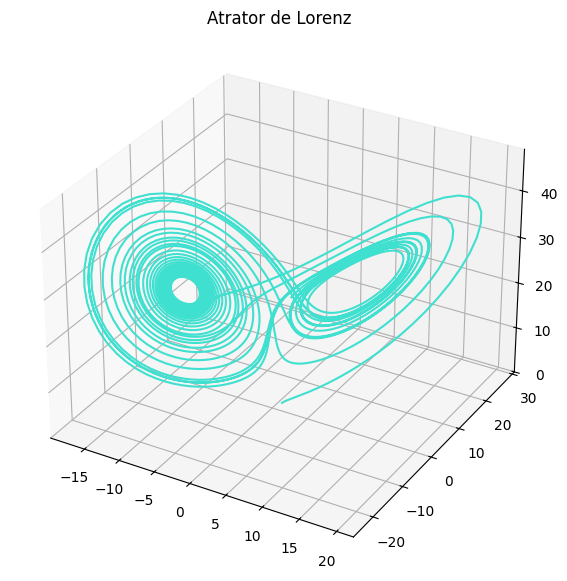

In [ ]:
# Parâmetros do sistema.
sigma = 10
rho = 28
beta = 8/3

# Condição inicial.
r0 = [1,1,1]

# Vetor temporal.
tempos = np.linspace(0, 30, 3000)

#Evolução da trajetória.
sol = odeint(lorenz, r0, tempos, args = (sigma,rho, beta))

# Plotagem.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Lorenz")
plt.show()

$\quad$ Uma das formas de visualizar a dinâmica desse sistema é evoluí-lo e fazer o plot da projeção em alguma dos planos (x, y ou z). É inclusive em um dessas projeções que temos o famoso formato de asas de borboleta do sistema de Lorenz. Assim, iremos fazer 

Text(0, 0.5, 'z')

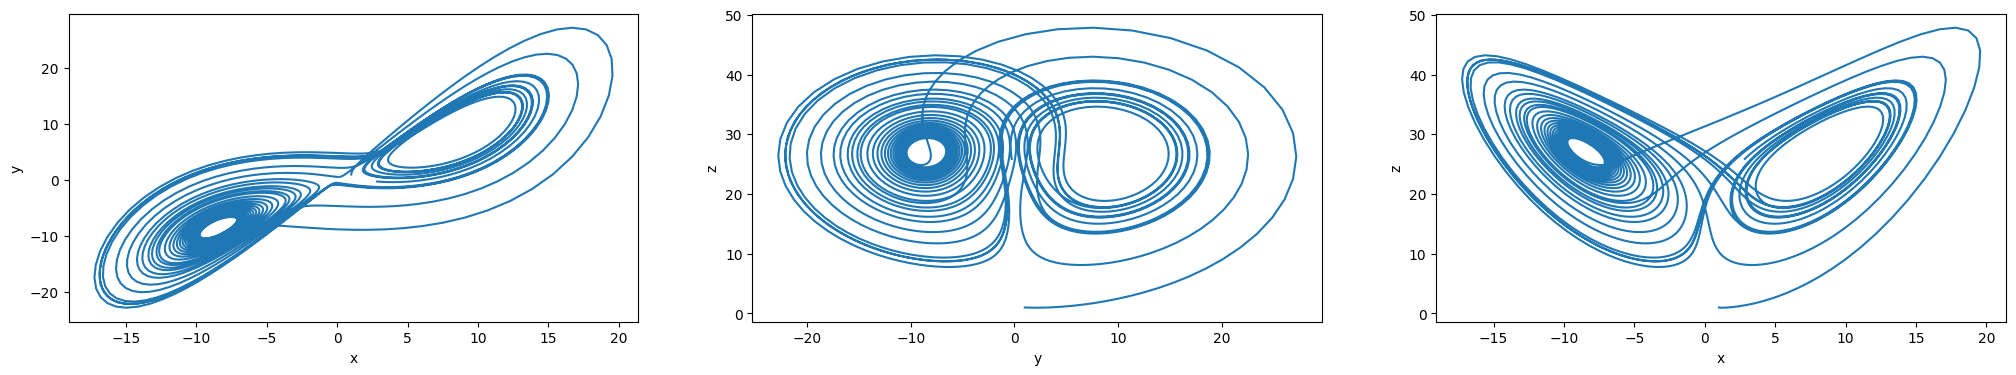

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

axes[0].plot(sol[:,0], sol[:,1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].plot(sol[:,1], sol[:,2])
axes[1].set_xlabel("y")
axes[1].set_ylabel("z")

axes[2].plot(sol[:,0], sol[:,2])
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

$\quad$ Contudo, a melhor forma de se entender o comportamento das variáveis no espaço de fase é visualizando a sua trajetória através do tempo, onde a animação é o recurso ideal para tal. Assim, faremos um plot da evolução total de uma dada trajetória com condição inicial qualquer, apenas para ter uma idela da "cara" da trajetória que o atrator vai criar; em seguida escolhemos um conjunto de pontos com pequena diferença entre as condiçõoes inicais, basicamente pontos bem próximos; para gerar a animação, evoluiremos os tais pontos de pouco em pouco, plotando só o ponto em cada estágio (e não a trajetória toda). Assim, desenvolvemos o código:

In [ ]:
# Valores de tempos 
tempos = np.linspace(0, 30, 1000) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.

# Condições Iniciais
epsilon = 10e-4 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([0,0,0], float)
N = 5
r_iniciais = r_inicial + epsilon * np.arange(N+1).reshape(-1,1)

# Armazenar as soluções 
solucoes = []
for r0 in r_iniciais:
    sol = odeint(lorenz, r0, tempos, args = (sigma, rho, beta))
    solucoes.append(sol)


# Dimensões do plot
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')


# Trajetórias fixas
linhas = []
for sol in solucoes:
    linha, = ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.8, alpha=0.6)
    linhas.append(linha)

# Pontos móveis (um por trajetória)
pontos = []
for _ in solucoes:
    ponto, = ax.plot([], [], [], 'ko', markersize=4)  # 'ko' = marcador preto
    pontos.append(ponto)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f'Atrator de Lorenz - {frame_idx/len(tempos)*100:.1f}%')
    ax.view_init(elev=30, azim=(frame_idx * 0.5) % 360)

    for i, sol in enumerate(solucoes):
        x, y, z = sol[frame_idx]
        pontos[i].set_data([x], [y])              # X e Y
        pontos[i].set_3d_properties([z])          # Z
    return pontos

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=60, blit=False)
plt.close(fig)
ani.save('Lorenz.gif', writer='pillow')


## Atrator de Rossler

$\quad$ Inicialmente estudado por Otto Rössler nos anos 1970, o Atrator de Rössler surge no contexto de um sistema de 3 EDOs, no chamado sistema de Rössler. O atrator presente nesse espaço de fase tem certas similaridades com o atrator de lorenz, mas é consideravelmente mais simple do que o mesmo. Por essa simplicidade, algumas de suas propriedades, como pontos fixos, podem ser estudados por meio de ferramentadas da própria algebra linear, fato que não será aqui abordado. Assim como no caso anteior do atrator de lorenz, simularemos a trajetória de condiçoes iniciais próximas no espaço de fase do sistema de Rössler.   

$$
\frac{dx}{dt} = -(y+z), \quad \frac{dy}{dt} =x+ay\quad \text{e} \quad \frac{dz}{dt} = b+z(x-c).
$$

In [11]:
def Rossler(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = -(y+z)
    dy = x+a*y
    dz = b+z*(x-c)
    return [dx, dy, dz]

$\quad$ 

Novamente realizando a evolução de apenas uma condição inicial no espaço de fase para nos dar uma ideia geral de como o atrator afeta as trajetórias, temos

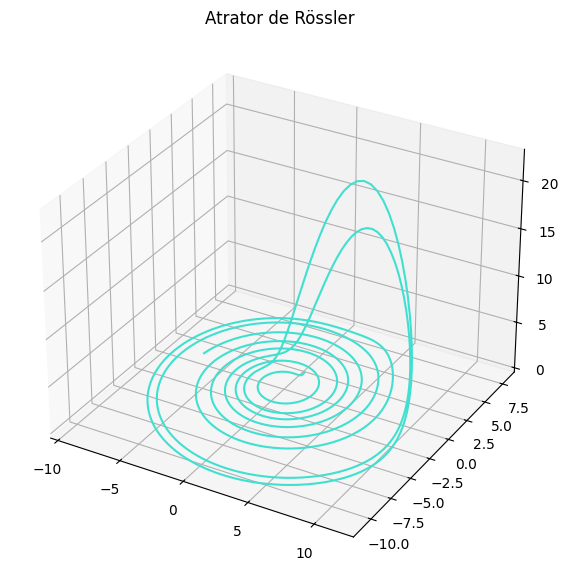

In [20]:
# Parâmetros do sistema
a, b, c = 0.2, 0.2, 5.7

# Condição inicial
r0 = [1,1,1]

# Vetor temporal
tempos = np.linspace(0, 50, 2000)

# Evolução temporal.
sol = odeint(Rossler, r0, tempos, args = (a,b,c))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Rössler")
plt.show()

Agora representando as projeções em cada eixo:

Text(0, 0.5, 'z')

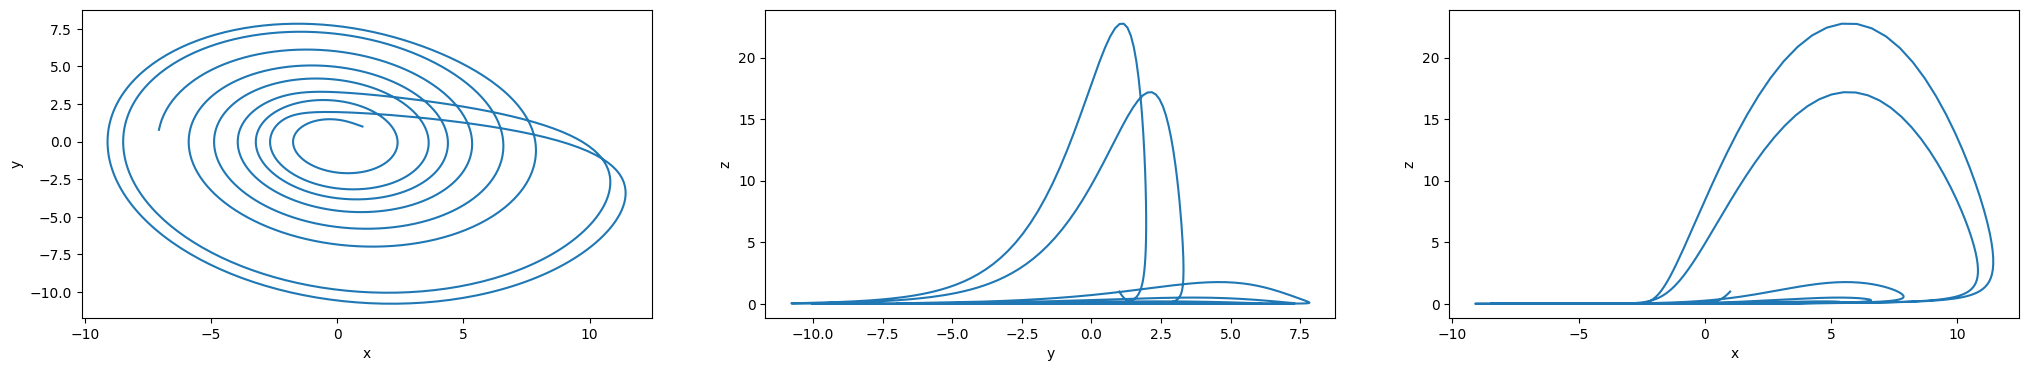

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

axes[0].plot(sol[:,0], sol[:,1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].plot(sol[:,1], sol[:,2])
axes[1].set_xlabel("y")
axes[1].set_ylabel("z")

axes[2].plot(sol[:,0], sol[:,2])
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

Por fim uma animação da evolução de diversas condições iniciais no espaço de fase desse atrator

In [21]:
# Valores de tempos 
tempos = np.linspace(0, 40, 1000) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.

# Condições Iniciais
epsilon = 10e-4 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([1,1,1], float)
N = 5
r_iniciais = r_inicial + epsilon * np.arange(N+1).reshape(-1,1)

# Armazenar as soluções 
solucoes = []
for r0 in r_iniciais:
    sol = odeint(Rossler, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

# Dimensões do plot
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Trajetórias fixas
linhas = []
for sol in solucoes:
    linha, = ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.8, alpha=0.6)
    linhas.append(linha)

# Pontos móveis (um por trajetória)
pontos = []
for _ in solucoes:
    ponto, = ax.plot([], [], [], 'ko', markersize=4)  # 'ko' = marcador preto
    pontos.append(ponto)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f'Atrator de Rössler - {frame_idx/len(tempos)*100:.1f}%')
    ax.view_init(elev=30, azim=(frame_idx * 0.5) % 360)

    for i, sol in enumerate(solucoes):
        x, y, z = sol[frame_idx]
        pontos[i].set_data([x], [y])              # X e Y
        pontos[i].set_3d_properties([z])          # Z
    return pontos

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=60, blit=False)
plt.close(fig)
ani.save('Rossler.gif', writer='pillow')


## Multiscroll Attractor 

$\quad$ Também conhecido como o Atrator de Chua, o Double-Scroll Attractor tem sua origem num circuito eletrônico caótico com um resistor não linear simples, o denominado circuito de Chua. Tal circuito é um sistema decrito por 3 EDOs, sendo elas:

$$
\frac{dx}{dt} = a(y-x), \quad \frac{dy}{dt} = (c-a)x - xz + cy \quad \text{e} \quad \frac{dz}{dt} = xy - bz.
$$

In [24]:
def Chua(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = a*(y-x)
    dy = (c-a)*x - x*z + c*y
    dz = x*y - b*z
    return [dx, dy, dz]

$\quad$ Como já é de costume, vamos evoluir uma trajetória no espaço de fase e observar o comportamento do atrator.

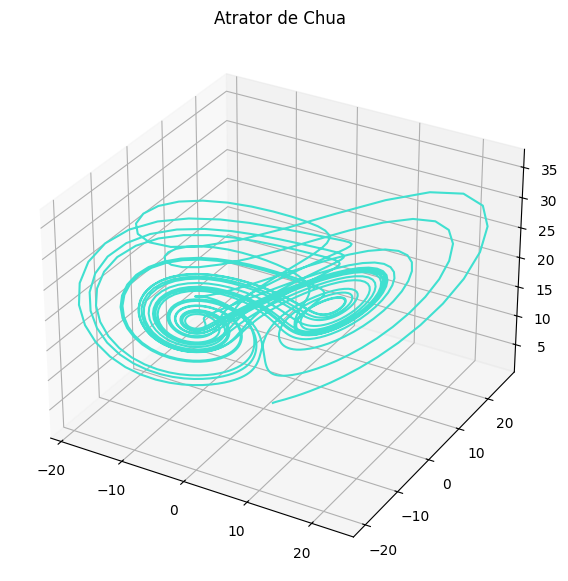

In [25]:
# Parâmetros do sistema
a, b, c = 40, 3, 28

# Condição inicial
r0 = [1,1,1]

# Vetor temporal
tempos = np.linspace(0, 20, 2000)

# Evolução temporal.
sol = odeint(Chua, r0, tempos, args = (a,b,c))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Chua")
plt.show()

$\quad$ Observando esse movimento nas projeções, temos a seguinte figura:

Text(0, 0.5, 'z')

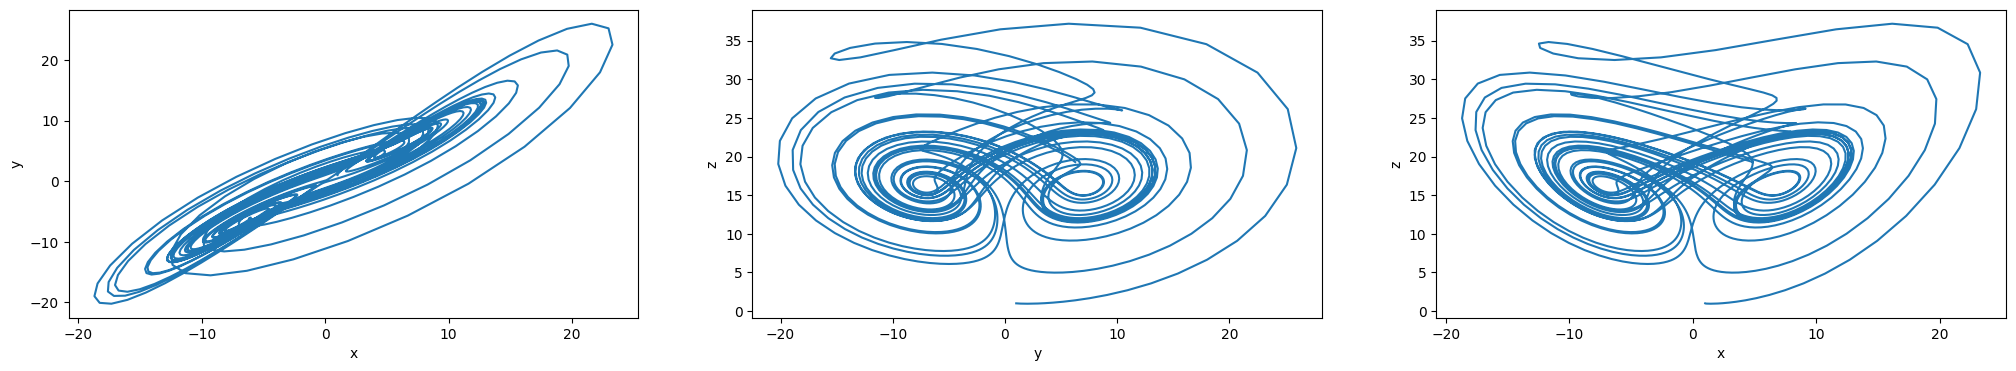

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(25, 4)) 

axes[0].plot(sol[:,0], sol[:,1])
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

axes[1].plot(sol[:,1], sol[:,2])
axes[1].set_xlabel("y")
axes[1].set_ylabel("z")

axes[2].plot(sol[:,0], sol[:,2])
axes[2].set_xlabel("x")
axes[2].set_ylabel("z")

Animação

In [27]:
# Valores de tempos 
tempos = np.linspace(0, 30, 1000) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.

# Condições Iniciais
epsilon = 10e-4 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([0,0,0], float)
N = 5
r_iniciais = r_inicial + epsilon * np.arange(N+1).reshape(-1,1)

# Armazenar as soluções 
solucoes = []
for r0 in r_iniciais:
    sol = odeint(Chua, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

# Dimensões do plot
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Trajetórias fixas
linhas = []
for sol in solucoes:
    linha, = ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.8, alpha=0.6)
    linhas.append(linha)

# Pontos móveis (um por trajetória)
pontos = []
for _ in solucoes:
    ponto, = ax.plot([], [], [], 'ko', markersize=4)  # 'ko' = marcador preto
    pontos.append(ponto)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f'Atrator de Chua - {frame_idx/len(tempos)*100:.1f}%')
    ax.view_init(elev=30, azim=(frame_idx * 0.5) % 360)

    for i, sol in enumerate(solucoes):
        x, y, z = sol[frame_idx]
        pontos[i].set_data([x], [y])              # X e Y
        pontos[i].set_3d_properties([z])          # Z
    return pontos

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=60, blit=False)
plt.close(fig)
ani.save('Chua.gif', writer='pillow')


## Hénon Map

$\quad$ Também exibindo um comportamento caótico, o mapa de Hénon é um sistema dinâmico com tempo discreto. As equações que o descrevem são as seguintes:

$$ 
x_{n+1} = 1 - ax_n^2 + y_n \ \text{ e } \ y_{n+1} = bx_n.
$$

In [ ]:
def henon_map(xn,yn, a, b):
    xn_p1 = 1 - a*xn**2 + yn
    yn_p1 = b*xn
    return np.array([xn_p1, yn_p1], float)

$\quad$ Definindo os valores clássicos utilizados para as constantens, $a = 1.4$ e $b = 0.3$ e evoluindo a condição inicial $x = 0$ e $y=0$ 50 vezes, temos o seguintes plot

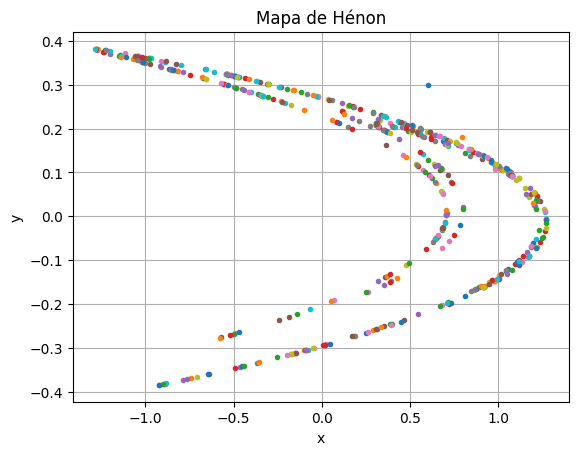

In [ ]:
a, b = 1.4, 0.3 # Constantes

r0 = np.array([1,1], float) # Condição Inicial

xs = [r0[0]]
ys = [r0[1]]

N = 500
for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    plt.plot(r0[0], r0[1], marker='o', linestyle='', markersize=3)

plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.title("Mapa de Hénon")
plt.show()

Testando um ponto fixo

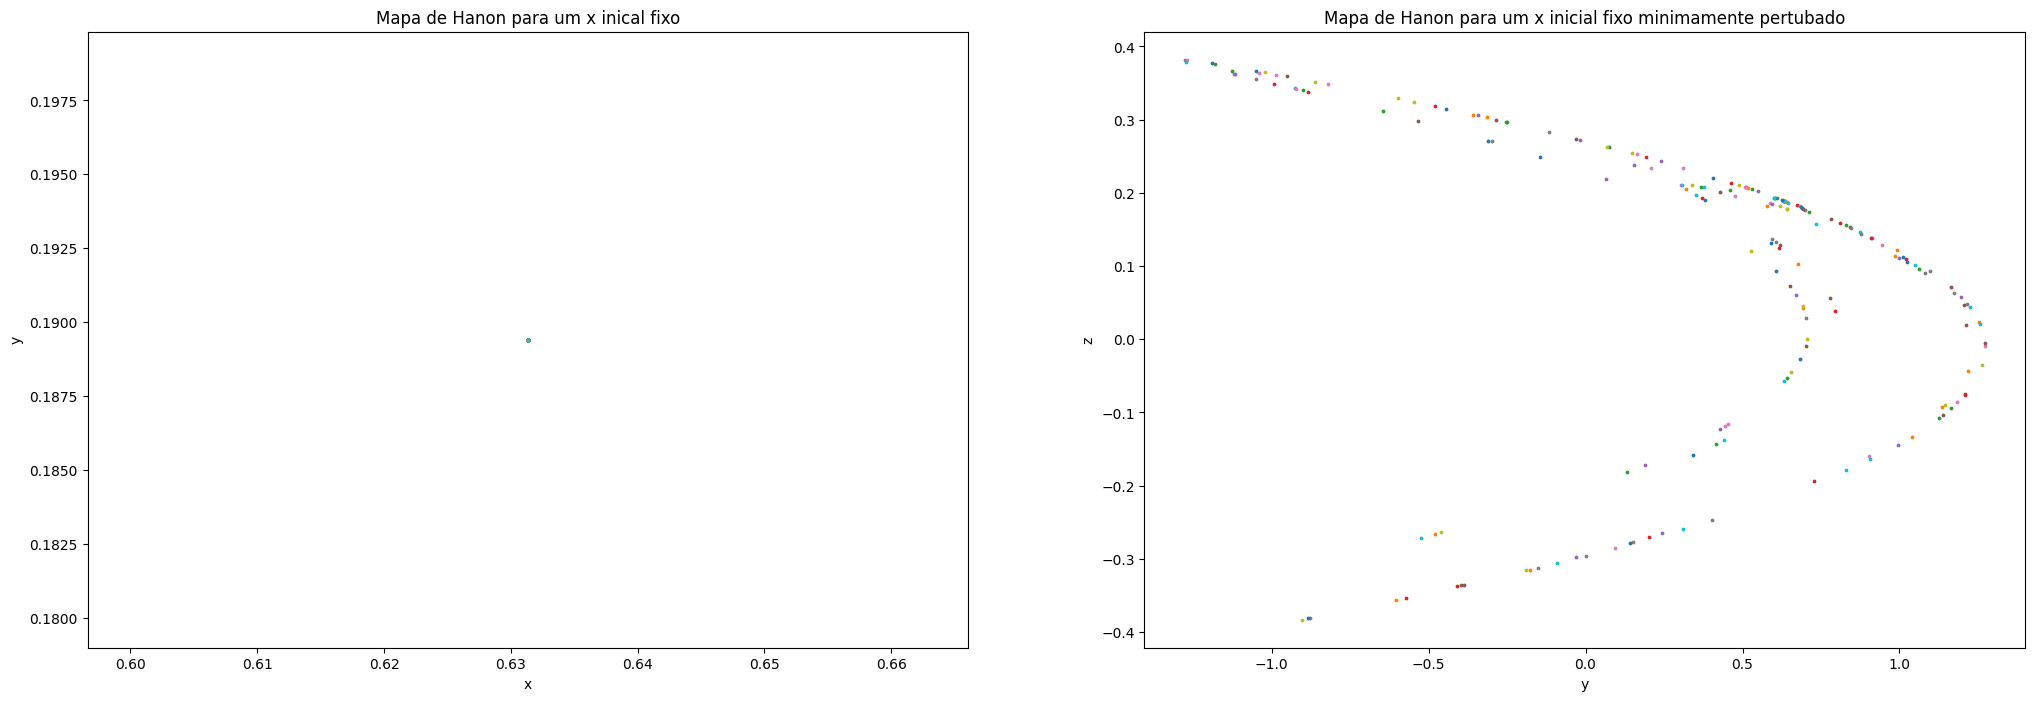

In [ ]:
r0 = np.array([(np.sqrt(609)-7)/28,  3*(np.sqrt(609)-7)/(280)], float) # Condição Inicial
epsilon = 10e-6
r1 = r0+epsilon

N = 500
fig, axes = plt.subplots(1, 2, figsize=(25, 8)) 

axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_title("Mapa de Hanon para um x inical fixo")

for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    axes[0].scatter(r0[0], r0[1], s=3)

axes[1].set_xlabel("y")
axes[1].set_ylabel("z")
axes[1].set_title("Mapa de Hanon para um x inicial fixo minimamente pertubado")

for n in range(N):
    r1 = henon_map(r1[0], r1[1], a, b)    
    axes[1].scatter(r1[0], r1[1], s=3)


Animacao da evolucao do mapa

In [ ]:
r0 = np.array([1,1], float) # Condição Inicial

xs = [r0[0]]
ys = [r0[1]]


N = 300
sol = [r0.copy()]

for _ in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)
    sol.append(r0.copy())

# Preparando a figura
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 0.5)

def atualizar(frame_idx):
    ax.set_title(f'Mapa de Hénon - {frame_idx/len(sol)*100:.2f}%')
    x, y = sol[frame_idx]
    ax.scatter(x,y, s = 1)


ani = animation.FuncAnimation(fig, atualizar, frames=len(sol), interval=50)
plt.close(fig)
ani.save('mapa_henon.gif', writer='pillow')


## Conclusão

$\quad$ Concluímos que o estudo do comportamento de sistemas caóticos é de grande importância para a física, pois esses sistemas estão presentes em diversas áreas, como na climatologia, com as equações de Lorenz que modelam padrões atmosféricos complexos, e na eletrônica, com o circuito de Chua. Apesar de sua sensibilidade extrema às condições iniciais dificultar previsões de longo prazo, compreender suas dinâmicas é essencial para melhorar a capacidade de previsão e controle em contextos reais.

## Referências

**[1]** Nonlinear Dynamics and Chaos, Steven H. Strogatz 2nd. Edition.

**[2]** https://en.wikipedia.org/wiki/Lorenz_system

**[3]** https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

**[4]** https://en.wikipedia.org/wiki/Multiscroll_attractor

**[5]** https://www.bbc.com/portuguese/geral-59617541